# Multimodal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors, pressure mat and depth camera, user-independently.

## Author(s)
Add your information here

Name: Martti Ilvesmäki

Student number:

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometers (attached to subject's thigh and wrist), pressure mat and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. There are totally 30 subjects in the  dataset, and in this work 25 persons is used as training and validation. Remaining 5 subjects has been given without subject or exercise IDs. Your work is to experiment different fusion methods and exercise classification. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the preprocessed dataset in Moodle.

The project work is divided on following phases:

1. Data exploration and visualization
2. Data preprocessing and feature extraction
3. Feature selection, fusion and model development and evaluation
4. Prediction of the held out test set

You are free to use libraries to do the tasks, for example scikit-learn numpy, matplotlib, etc.. In each phase, you should visualize and analyse the results and document the work to a <b>min 3 - max 10 page report </b>. Nice looking and informative report representing your results and analysis will be part of the grading in addition to actual implementation. Return the notebook together with your report as pdf in Moodle.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Overview of the data

The MEx dataset has been preprocessed into feature files ready for machine learning. The preprocessing extracts statistical features from multi-modal sensor data using sliding time windows and aggregating the information. After feature extraction the data rows (windows) has been shuffled randomly.

### Data Files Provided

#### 1. **mex_features_train.csv**
- **Purpose**: Training and validation dataset with labels (exercise ID)
- **Size**: 25 subjects
- **Subject IDs**: Renumbered from 1 to 25 (anonymized, not original IDs)
- **Contains**: `subject_id`, `exercise`, and all feature columns


#### 2. **mex_features_test_no_labels.csv**
- **Purpose**: Test dataset without labels
- **Size**: 5 subjects, same features as mex_features_train.csv
- **Contains**: ONLY feature columns (no `subject_id` or `exercise`)
- **Use**: Make predictions to data from this file at task 4. <b> DO NOT USE THIS DATA BEFORE TASK 4. </b>

## Data Structure

### Key Columns

1. **subject_id** (only in train data)
   - Training: Values 1-25 (renumbered for anonymization)

2. **exercise** (only in train data)
   - Values: 1-7

3. **Feature columns** (same in all files)
   - Accelerometer features: min,max,mean,std for each axis. ACT = Accelerometer in thigh, ACW = Accelerometer in wrist 
   - Depth camera features: Pixel level mean and std from 12x16 image in vectorized form
   - Pressure mat features: Mean and std from 32x16 pressure mat in vectorized form

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data exploration and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Task 1.</b> (3 Points)

Download the preprocessed data from Moodle. Example code for loading and filtering modalities is provided below.

**Your task:** Explore the dataset and create informative visualizations for your report. Consider the characteristics of each modality, class distributions, data balance, and patterns that might be relevant for classification. Choose visualizations that best communicate your findings.


Training data shape: (4923, 1434)

1. Accelerometer ACT columns (12 features):
   ['act_x_mean', 'act_x_std', 'act_x_min', 'act_x_max', 'act_y_mean', 'act_y_std', 'act_y_min', 'act_y_max', 'act_z_mean', 'act_z_std', 'act_z_min', 'act_z_max']
2. Accelerometer ACW columns (12 features):
   ['acw_x_mean', 'acw_x_std', 'acw_x_min', 'acw_x_max', 'acw_y_mean', 'acw_y_std', 'acw_y_min', 'acw_y_max', 'acw_z_mean', 'acw_z_std', 'acw_z_min', 'acw_z_max']
3. Pressure Mat columns (Only first five, total 1024 features):
   ['pressure_mat_pixel_0_mean', 'pressure_mat_pixel_0_std', 'pressure_mat_pixel_1_mean', 'pressure_mat_pixel_1_std', 'pressure_mat_pixel_2_mean'] ...
4. Depth Camera columns (Only first five, total 384 features):
   ['depth_pixel_0_mean', 'depth_pixel_0_std', 'depth_pixel_1_mean', 'depth_pixel_1_std', 'depth_pixel_2_mean'] ...

Example: Extract only depth camera std features
Number of depth camera std features: 192
First 5: ['depth_pixel_0_std', 'depth_pixel_1_std', 'depth_pixel_2

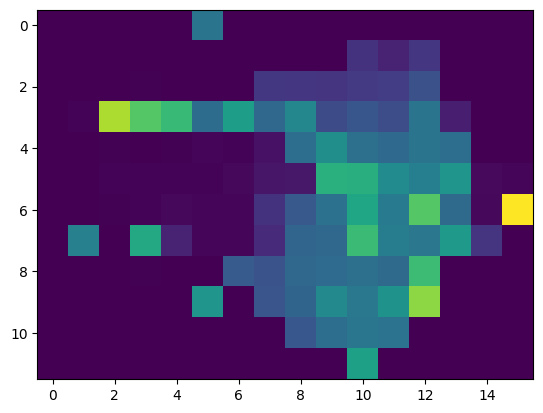

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv('mex_features_train.csv')
print(f"\nTraining data shape: {train_df.shape}")

# Filtering the modalities
acc_act_cols = [col for col in train_df.columns if col.startswith('act_')]
acc_acw_cols = [col for col in train_df.columns if col.startswith('acw_')]
pressure_cols = [col for col in train_df.columns if col.startswith('pressure_mat_')]
depth_cols = [col for col in train_df.columns if col.startswith('depth_')]
print(f"\n1. Accelerometer ACT columns ({len(acc_act_cols)} features):")
print(f"   {acc_act_cols}")
print(f"2. Accelerometer ACW columns ({len(acc_acw_cols)} features):")
print(f"   {acc_acw_cols}")
print(f"3. Pressure Mat columns (Only first five, total {len(pressure_cols)} features):")
print(f"   {pressure_cols[:5]} ...")
print(f"4. Depth Camera columns (Only first five, total {len(depth_cols)} features):")
print(f"   {depth_cols[:5]} ...")

# Example: Extract only depth camera std features
print("\nExample: Extract only depth camera std features")
depth_std_cols = [col for col in depth_cols if '_std' in col]
print(f"Number of depth camera std features: {len(depth_std_cols)}")
print(f"First 5: {depth_std_cols[:5]}")
# Plot the first image from depth camera std
depth_std_example = train_df[depth_std_cols].iloc[0].values
depth_std_image = depth_std_example.reshape(12, 16)
plt.imshow(depth_std_image, cmap='viridis', aspect='auto')
plt.show()

In [ ]:
import numpy as np

['subject_id', 'exercise', 'act_x_mean', 'act_x_std', 'act_x_min', 'act_x_max', 'act_y_mean', 'act_y_std', 'act_y_min', 'act_y_max', 'act_z_mean', 'act_z_std', 'act_z_min', 'act_z_max', 'acw_x_mean', 'acw_x_std', 'acw_x_min', 'acw_x_max', 'acw_y_mean', 'acw_y_std', 'acw_y_min', 'acw_y_max', 'acw_z_mean', 'acw_z_std', 'acw_z_min', 'acw_z_max', 'pressure_mat_pixel_0_mean', 'pressure_mat_pixel_0_std', 'pressure_mat_pixel_1_mean', 'pressure_mat_pixel_1_std', 'pressure_mat_pixel_2_mean', 'pressure_mat_pixel_2_std', 'pressure_mat_pixel_3_mean', 'pressure_mat_pixel_3_std', 'pressure_mat_pixel_4_mean', 'pressure_mat_pixel_4_std', 'pressure_mat_pixel_5_mean', 'pressure_mat_pixel_5_std', 'pressure_mat_pixel_6_mean', 'pressure_mat_pixel_6_std', 'pressure_mat_pixel_7_mean', 'pressure_mat_pixel_7_std', 'pressure_mat_pixel_8_mean', 'pressure_mat_pixel_8_std', 'pressure_mat_pixel_9_mean', 'pressure_mat_pixel_9_std', 'pressure_mat_pixel_10_mean', 'pressure_mat_pixel_10_std', 'pressure_mat_pixel_11_mea

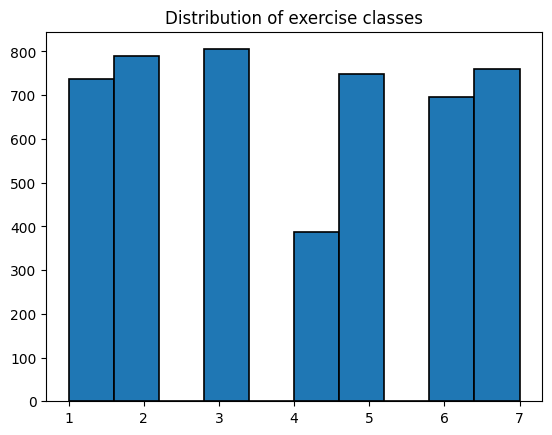

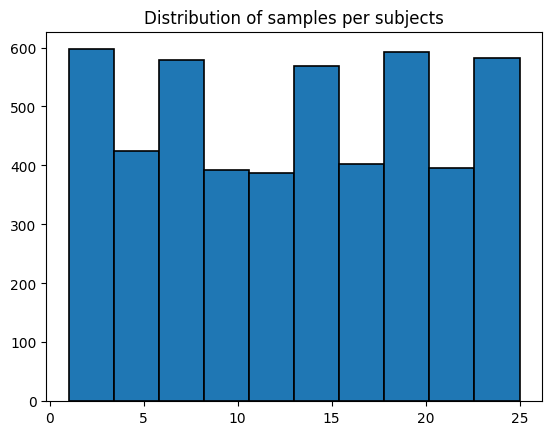


1. Total number of features: 1432
        act_x_mean    act_x_std    act_x_min    act_x_max   act_y_mean  \
count  4923.000000  4923.000000  4923.000000  4923.000000  4923.000000   
mean     -0.043738     0.084839    -0.213862     0.125889     0.021000   
std       0.632451     0.101467     0.670711     0.659041     0.591164   
min      -1.005330     0.000000    -2.515625    -0.984375    -0.990820   
25%      -0.604490     0.013705    -0.796875    -0.390625    -0.507964   
50%      -0.062713     0.043409    -0.218750     0.000000    -0.008859   
75%       0.587679     0.116063     0.406250     0.750000     0.597501   
max       0.936497     0.550262     0.921875     2.984375     0.923908   

         act_y_std    act_y_min    act_y_max   act_z_mean    act_z_std  ...  \
count  4923.000000  4923.000000  4923.000000  4923.000000  4923.000000  ...   
mean      0.088973    -0.157205     0.193841     0.019937     0.093891  ...   
std       0.106229     0.622982     0.600048     0.345142    

In [ ]:

# Do more exploration and visualization of the data here

# View headers 
print(list(train_df))

# Analyze subject IDs and exercise (ground truth) values
y_train = train_df.exercise.values
sub_ids = train_df.subject_id.values

print("\nExamples of subject IDs : ", sub_ids[np.random.randint(0, len(sub_ids), 5)])

# Histograms
# TODO: make more cleaner looking histograms
fig = plt.Figure(figsize=(10, 5))

fig.add_subplot(2, 1, 1)
plt.hist(y_train, edgecolor='black', linewidth=1.2)
plt.title("Distribution of exercise classes")
plt.show()

fig.add_subplot(2, 1, 2)
plt.hist(sub_ids, edgecolor='black', linewidth=1.2)
plt.title("Distribution of samples per subjects")
plt.show()


total_number_of_features = len(acc_act_cols) + len(acc_acw_cols) + len(pressure_cols) + len(depth_cols)
print(f"\n1. Total number of features: {total_number_of_features}")


columns_to_drop = ['subject_id', 'exercise']
train_df_feats = train_df.drop(columns=columns_to_drop, axis=1)

pressure_cols

# Plot the first image from depth camera std
#pressure_mat_first = train_df[depth_std_cols].iloc[0].values
#depth_std_image = depth_std_example.reshape(12, 16)
#plt.imshow(depth_std_image, cmap='viridis', aspect='auto')
#plt.show()

# 2. Data preprocessing and feature extraction

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Task 2.</b> (3 Points)

**Your task:** Prepare the data for modeling. Consider what preprocessing steps and feature engineering might improve classification performance. Common approaches include normalization, dimensionality reduction (PCA, LDA), feature selection, or creating new features. Document your choices and rationale in the report.

*Hint: The objects/transformers you create here can be used in Task 3.*
    
</div>

In [4]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
import time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector as SFS
import sys
from sklearn.base import clone
from scipy.stats import mode
from collections import Counter
from sklearn.preprocessing import StandardScaler

def make_pipelines_early_fusion_pca_sfs():
    clf_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.9)),
        ("clf", LogisticRegression(max_iter=1000, C=0.1, class_weight="balanced"))
    ])

    # Forward feature selection using the pipeline as estimator
    sfs = SFS(
        clf_pipeline,
        n_features_to_select=2,
        direction="forward",
        scoring='f1_macro',
        cv=3,   # internal CV
        n_jobs=None
    )

    pipe = Pipeline([ ("sfs", sfs)])
    return {"logreg" : pipe}

def make_pipelines_logreg_svms_pca():
    # Pipeline with logistic regression and different SVM variants
        return {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.9)),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=0.1,
                class_weight="balanced"
            ))
        ]),
        "svc-linear": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.9)),
            ("clf", SVC(
                kernel="rbf",
                class_weight="balanced"
            ))
        ]),
        "svc-rbf": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.9)),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ]),
        "svc-poly": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.9)),
            ("clf", SVC(
                kernel="poly",
                degree = 3,
                class_weight="balanced"
            ))
        ]) }

def make_pipelines_pca():
    return {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.9)),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=0.1,
                class_weight="balanced"
            ))
        ]),
        "gnb": Pipeline([
            ("scaler", StandardScaler()),  # optional but recommended
            ("pca", PCA(n_components=0.9)),
            ("clf", GaussianNB()),
        ]),
        "ada": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.9)),
            ("clf", AdaBoostClassifier(
                n_estimators=50,
                random_state=0
            ))
        ]),
        "svc": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.9)),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ])
    }

def make_base_classification_pipelines():
    return {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=0.1,
                class_weight="balanced"
            ))
        ]),
        "gnb": Pipeline([
            # No scaler on purpose
            ("clf", GaussianNB())
        ]),
        "ada": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", AdaBoostClassifier(
                n_estimators=100,
                random_state=0
            ))
        ]),
        "svc": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ])
    }

def early_fusion_approach(X_train, y_train, X_test, y_test, approach):

    if approach == 1:
        pipelines = make_base_classification_pipelines()
    elif approach == 2:
        pipelines = make_pipelines_pca()
    elif approach == 3:
        pipelines = make_pipelines_early_fusion_pca_sfs()

    scores = {
    "logreg": 0.0,
    "gnb": 0.0,
    "ada": 0.0,
    "svc": 0.0
    }
    for name, pipe in pipelines.items():
        pipe.fit(X_train, y_train)
        y_hat = pipe.predict(X_test)
        scores[name] = f1_score(y_test, y_hat, average="macro")

    return scores["logreg"], scores["gnb"], scores["ada"], scores["svc"]

def borda_count(preds):
    # Borda count for class labels
    y_final = []
    for i in range(preds.shape[1]):
        votes = preds[:, i]
        counts = Counter(votes)
        y_final.append(counts.most_common(1)[0][0])
    return np.array(y_final)

def aggregate_predictions(preds, strategy):
    """
    preds: ndarray of shape (n_modalities, n_samples)
    """
    if strategy == "majority":
        return mode(preds, axis=0).mode.ravel()

    elif strategy == "borda":
        # Borda count for class labels
        return borda_count(preds)


def late_fusion_approach(X_train, y_train, X_test, y_test, feat_names, approach):
    # Function to test late fusion approaches

    # Split data according to modality
    modalities = ["act", "acw", "pressure", "depth"]
    X_modalities = split_data_based_on_modality(X_train, X_test, feat_names)
    pipelines = make_pipelines_pca()  #make_base_classification_pipelines()
    best_scores = {clf: -np.inf for clf in pipelines}
    best_agg = {clf: None for clf in pipelines}

    if approach == 4:

        if approach == 4:
            aggregations = ["majority", "borda"]
        elif approach == 5:
            aggregations = ["borda"]

        for clf_name, base_pipe in pipelines.items():
            modality_preds = []

            for modality in ["act", "acw", "pressure", "depth"]:
                X_tr = X_modalities[f"{modality}_train"]
                X_te = X_modalities[f"{modality}_test"]

                pipe = clone(base_pipe)   # IMPORTANT
                pipe.fit(X_tr, y_train)

                y_hat = pipe.predict(X_te)
                modality_preds.append(y_hat)

            # shape: (n_modalities, n_samples)
            modality_preds = np.vstack(modality_preds)

            # test aggregation strategies
            for agg in aggregations:
                y_fused = aggregate_predictions(modality_preds, agg)
                f1 = f1_score(y_test, y_fused, average="macro")

                if f1 > best_scores[clf_name]:
                    best_scores[clf_name] = f1
                    best_agg[clf_name] = agg

    elif approach == 5:

        for clf_name, base_pipe in pipelines.items():
            modality_preds = []

            for modality in ["act", "acw", "pressure", "depth"]:
                X_tr = X_modalities[f"{modality}_train"]
                X_te = X_modalities[f"{modality}_test"]

                pipe = clone(base_pipe)   # IMPORTANT
                pipe.fit(X_tr, y_train)

                y_hat = pipe.predict(X_te)
                modality_preds.append(y_hat)

            # shape: (n_modalities, n_samples)
            modality_preds = np.vstack(modality_preds)

            y_fused = borda_count(modality_preds)
            f1 = f1_score(y_test, y_fused, average="macro")
            best_scores[clf_name] = f1


    return best_scores["logreg"], best_scores["gnb"], best_scores["ada"], best_scores["svc"], best_agg

def split_data_based_on_modality(X_train, X_test, feat_names):
    # INPUTS
    # X_data : features
    # y_data : labels
    # feat_names : list

    # OUTPUTS
    # dictionary output of train-test data per modality

    X_train = pd.DataFrame(X_train, columns=feat_names)
    X_test  = pd.DataFrame(X_test, columns=feat_names)

    
    # Identify columns by modality
    act_cols = [c for c in feat_names if c.startswith("act_")]
    acw_cols = [c for c in feat_names if c.startswith("acw_")]
    pressure_cols = [c for c in feat_names if c.startswith("pressure_mat_")]
    depth_cols = [c for c in feat_names if c.startswith("depth_")]

    # Split features
    X_train_act = X_train[act_cols].values
    X_test_act = X_test[act_cols].values

    X_train_acw = X_train[acw_cols].values
    X_test_acw = X_test[acw_cols].values

    X_train_pressure = X_train[pressure_cols].values
    X_test_pressure = X_test[pressure_cols].values

    X_train_depth = X_train[depth_cols].values
    X_test_depth = X_test[depth_cols].values

    # Labels are the same for all modalities
    return {
        "act_train": X_train_act,
        "act_test": X_test_act,
        "acw_train": X_train_acw,
        "acw_test": X_test_acw,
        "pressure_train": X_train_pressure,
        "pressure_test": X_test_pressure,
        "depth_train": X_train_depth,
        "depth_test": X_test_depth
    }


# 3. Feature selection, fusion and model development and evaluation

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Task 3.</b> (10 Points)

**Your task:** Develop and evaluate a user-independent exercise classifier

Experiment with:
- At least **two different fusion strategies** (e.g., early fusion (feature level), late fusion (decision level), intermediate level (eg. kernel level fusion), hybrid of any combination

You could also experiment with:
- Different classifiers and architectures
- Various feature combinations

In your report, document what you tried, explain your design choices, and present your best approach with confusion matrix and F1-score.

**Important:** The approach you finalize here will be used for the held-out test set prediction in Task 4.

*Hint: Consider using Leave-One-Subject-Out (LOSO) cross-validation. You might want to try some new things on task 2 based on the results here*
</div>

In [5]:
# Fusion strategies to test
#
# Approach 1 - utilize all features from all modalities with LOSO-CV - standardize data
#
# Approach 1 Avg. F1 macro scores
# Logistic regression F1 score : 0.8694898412557795
# Naive Bayes F1 score : 0.5214310306023093
# AdaBoost F1 score : 0.33339218807885046
# SVC F1 score : 0.8772841420545663
# 
# NOTES
# Adaboost only used 10 ensembles to speed up and thus likely under performed
# Best model: SVC () kernel="linear", class_weight="balanced")
# In next approach dimensionalities are reduced

# Approach 2 - PCA dimensionality reduction with early fusion (PCs : 150)
# Avg. F1 macro scores
# Approach 2 Avg. F1 macro scores
# Logistic regression F1 score : 0.8595427538322881
# Naive Bayes F1 score : 0.3559731189093147
# AdaBoost F1 score : 0.5266776969610779
# SVC F1 score : 0.8359281966469453
#
# NOTES: 
# Best model is Logistic regression but it's weaker than in last round


# Approach 3 - PCA with Logistic regression (variance explained = 90% + SFS feature selection)
# Rationale : Logistic regression is fast and PCA dimensionality reduction makes it even faster
# Let's try to mine from features that explain 90% of the variance the best ones with SFS


# Late Fusion

# Approach  4 - parallel apparoach : use accelerometer, video and pressure in parallel and conduct fusion as last step
# Consider : SVC with different kernels (polynomial, RBF).
# Majority vote and borda count are tested as combination strategies

#Approach 4 Avg. F1 macro scores
#Logistic regression F1 score : 0.8883773042132458
#Naive Bayes F1 score : 0.8089168611761173
#AdaBoost F1 score : 0.878568804266227
#SVC F1 score : 0.8945082734387513
# Borda selected 2/3 times across all.

# Approach 5
# Same as app 4 but we use borda count because it was superior in approach 4

# Approach 5 Avg. F1 macro scores
# Logistic regression F1 score : 0.8562715221592293
# Naive Bayes F1 score : 0.7138920174519674
# AdaBoost F1 score : 0.6335289245424124
# SVC F1 score : 0.857413306641343

# IDEA: test for each dataset the classification - find best model for each task


#
# NOTES from Miika:
# 1 Project is sufficient in terms of classifiers.. Just put more fusion methods.. at least one more.. late fusion..
# 2 Document in project report where the pre-process methods are (in pipelines)
# 3 Windowing of data : 5 seconds with 2 sec overlap (more or less)
#

# Classifiers to test (typical)
# Logistic Regression
# Naive Bayes
# SVM learners
# AdaBoost

# More classifiers
# XGBoost?

# Feature selection methods to test
# PCA (select some of the components)
# SFS

# VALIDATION
# LOSOCV for each approach defines 

In [6]:
# Approaches 1-4

feat_names = train_df_feats.columns.tolist()

logo = LeaveOneGroupOut()

X_train = train_df_feats.values
print(X_train.shape)

#print(type(train_df))
#print(train_df.columns)
#print(train_df.info)
#print(train_df.head)
#train_df.tail()
#sys.exit()

#y_train = train_df.exercise.values
#sub_ids = train_df.subject_id.values
#train_df_feats

# LOSO-CV validation

n_folds = len(np.unique(sub_ids))

# Experiments 1-3 : Early Fusion
# Experiments 4- : Late Fusion

approach = 5 # 1, 2, 3, 4... experiment number

print(f"Approach {approach}")
logreg_f1scs = np.zeros((n_folds, 1))
gnb_f1scs = np.zeros((n_folds, 1))
ada_f1scs = np.zeros((n_folds, 1))
svc_f1scs = np.zeros((n_folds, 1))

if approach == 4:
    # Late fusion
    strategies = ["majority vote", "borda"]
    agg_counter = Counter()
elif approach == 5:
    strategies = ["borda"]
    agg_counter = Counter()

for i, (train_index, test_index) in enumerate(logo.split(X_train, y_train, sub_ids)):
    t_start = time.time()
    X_valid = X_train[train_index, :]
    y_valid = y_train[train_index]
    X_valid_test = X_train[test_index, :]
    y_valid_test = y_train[test_index]

    # Early fusion : utilize all features from all modalities with LOSO-CV

    if approach <= 3:
        f1_logreg, f1_gnb, f1_ada, f1_svc = early_fusion_approach(X_valid, y_valid,
                                                                   X_valid_test, 
                                                                   y_valid_test, approach)
    else:
        # Late fusion
        f1_logreg, f1_gnb, f1_ada, f1_svc, best_agg = late_fusion_approach(X_valid, y_valid, 
                                                                 X_valid_test, y_valid_test,
                                                                   feat_names, approach)
        
        # Count best aggregation strategies across classifiers
        agg_counter.update(best_agg.values())

    logreg_f1scs[i] = f1_logreg
    gnb_f1scs[i] = f1_gnb
    ada_f1scs[i] = f1_ada
    svc_f1scs[i] = f1_svc

    if i % 1 == 0:
        print(f"Fold {i+1} \\ {n_folds} running average F1 scores")
        print(f"Logistic regression F1 score : {np.mean(f1_logreg)}")
        print(f"Naive Bayes F1 score : {np.mean(f1_gnb)}")
        print(f"AdaBoost F1 score : {np.mean(f1_ada)}")
        print(f"SVC F1 score : {np.mean(f1_svc)}")
        print(f"Time taken : {round(time.time() - t_start)} seconds")
    
print(f"\nApproach {approach} Avg. F1 macro scores")
print(f"Logistic regression F1 score : {np.mean(logreg_f1scs)}")
print(f"Naive Bayes F1 score : {np.mean(gnb_f1scs)}")
print(f"AdaBoost F1 score : {np.mean(ada_f1scs)}")
print(f"SVC F1 score : {np.mean(svc_f1scs)}")

if approach > 3:
    plt.figure(figsize=(6,4))
    plt.bar(agg_counter.keys(), agg_counter.values(), color='skyblue')
    plt.xlabel('Aggregation Strategy')
    plt.ylabel('Number of Wins')
    plt.title('Aggregation Strategy Usage Across LOSO Folds')
    plt.show()
    


(4923, 1432)
Approach 5


KeyboardInterrupt: 

In [ ]:
# Approach:
# Give features to mixutre of experts
# 1) Test which classifiers work best with corresponding features
# 2) Then utilize these classifiers to these features
# 3) Provide weights to each classifier based on performance at fusion level
# For fusion tests will be done with SVM, lin reg, and ada boost

# From now on, each approach gets its own cell for clarity

# 6.1 - test Log reg, naive bayes, adaboost and svc with different feature stes
# Best classifier for ACT : SVC with f1 : 0.6559317273506693
# Best classifier for ACW : Logistic Regression with f1 : 0.3606128566321879
# Best classifier for Pressure mat : Logistic Regression with f1 : 0.3606128566321879
# Best classifier for Depth Camera : Logistic Regression with f1 : 0.6077135065605049
    
# 6.2 test log reg, svc-linear, svc-rbf, svc-linear
# Best classifier for ACT : SVM linear with f1 : 0.8069062264251637
# Best classifier for ACW : SVM linear with f1 : 0.41693192727754963
# Best classifier for Pressure mat : SVM linear with f1 : 0.41693192727754963
# Best classifier for Depth Camera : Logistic Regression with f1 : 0.607713506560504


def mixutre_of_experts_baseline_mdl_evaluation(X_train, X_test, y_train, y_test,approach):

    #pipelines = make_base_classification_pipelines()

    if approach == 6.1:
        pipelines = make_pipelines_pca()
        
        scores = {
        "logreg": 0.0,
        "gnb": 0.0,
        "ada": 0.0,
        "svc": 0.0
        }
        for name, pipe in pipelines.items():
            pipe.fit(X_train, y_train)
            y_hat = pipe.predict(X_test)
            scores[name] = f1_score(y_test, y_hat, average="macro")

        return scores["logreg"], scores["gnb"], scores["ada"], scores["svc"]

    elif approach == 6.2:
        pipelines = make_pipelines_logreg_svms_pca()
        scores = {
        "logreg": 0.0,
        "svc-linear": 0.0,
        "svc-poly": 0.0,
        "svc-rbf": 0.0
        }

        for name, pipe in pipelines.items():
            pipe.fit(X_train, y_train)
            y_hat = pipe.predict(X_test)
            scores[name] = f1_score(y_test, y_hat, average="macro")

        return scores["logreg"], scores["svc-linear"], scores["svc-poly"], scores["svc-rbf"]

feat_names = train_df_feats.columns.tolist()
logo = LeaveOneGroupOut()

X_train = train_df_feats.values
print(X_train.shape)

# Define here data 
mod_of_interest = ["act", "acw", "pressure_mat", "depth"]

act_cols = [c for c in feat_names if c.startswith("act_")]
acw_cols = [c for c in feat_names if c.startswith("acw_")]
pressure_cols = [c for c in feat_names if c.startswith("pressure_mat_")]
depth_cols = [c for c in feat_names if c.startswith("depth_")]


# LOSO-CV validation
n_folds = len(np.unique(sub_ids))

approach = 6.1 # 1, 2, 3, 4... experiment number

print(f"Approach {approach}")
if approach == 6.1:
    logreg_f1scs = np.zeros((n_folds, len(mod_of_interest)))
    gnb_f1scs = np.zeros((n_folds, len(mod_of_interest)))
    ada_f1scs = np.zeros((n_folds, len(mod_of_interest)))
    svc_f1scs = np.zeros((n_folds, len(mod_of_interest)))
elif approach == 6.2:
    logreg_f1scs = np.zeros((n_folds, len(mod_of_interest)))
    svc_lin_f1scs = np.zeros((n_folds, len(mod_of_interest)))
    svc_poly_f1scs = np.zeros((n_folds, len(mod_of_interest)))
    svc_rbf_f1scs = np.zeros((n_folds, len(mod_of_interest)))

for i, (train_index, test_index) in enumerate(logo.split(X_train, y_train, sub_ids)):
    t_start = time.time()
    X_valid = X_train[train_index, :]
    y_valid = y_train[train_index]
    X_valid_test = X_train[test_index, :]
    y_valid_test = y_train[test_index]

    X_modality = split_data_based_on_modality(X_valid, X_valid_test, feat_names)

    for j in range(0, len(mod_of_interest)):

        if mod_of_interest[j] == "act":
            X_valid = X_modality["act_train"]
            X_valid_test = X_modality["act_test"]
        elif mod_of_interest[j] == "acw":
            X_valid = X_modality["acw_train"]
            X_valid_test = X_modality["acw_test"]
        elif mod_of_interest[j] == "pressure":
            X_valid = X_modality["pressure_train"]
            X_valid_test = X_modality["pressure_test"]
        elif mod_of_interest[j] == "depth":
            X_valid = X_modality["pressure_train"]
            X_valid_test = X_modality["pressure_test"]



        # Early fusion : utilize all features from all modalities with LOSO-CV
        
        f1_1, f1_2, f1_3, f1_4 = mixutre_of_experts_baseline_mdl_evaluation(
                                                                    X_valid, X_valid_test, 
                                                                    y_valid, y_valid_test, approach
                                                                    )
        

        if approach == 6.1:
            logreg_f1scs[i][j] = f1_1
            gnb_f1scs[i][j] = f1_2
            ada_f1scs[i][j]  = f1_3
            svc_f1scs[i][j]  = f1_4
        elif approach == 6.2:
            logreg_f1scs[i][j] = f1_1
            svc_lin_f1scs[i][j] = f1_2
            svc_poly_f1scs[i][j] = f1_3
            svc_rbf_f1scs[i][j] = f1_4


    if i % 2 == 0:
        print(f"Fold {i+1} \\ {n_folds}")


if approach == 6.1:
    print(f"\nApproach {approach} Avg. F1 macro scores for different feature subsets (act, acw, pressure, depth)")
    print(f"Logistic regression F1 score : {np.mean(logreg_f1scs[:i, :], axis=0)}")
    print(f"Naive Bayes F1 score : {np.mean(gnb_f1scs[:i, :], axis=0)}")
    print(f"AdaBoost F1 score : {np.mean(ada_f1scs[:i, :], axis=0)}")
    print(f"SVC F1 score : {np.mean(svc_f1scs[:i, :], axis=0)}")

    # Identify best base learners
    classifs = ["Logistic Regression", "Naive Bayes", "AdaBoost", "SVC"]
    best_act = np.mean(np.vstack((logreg_f1scs[:, 0], gnb_f1scs[:, 0], ada_f1scs[:,0], svc_f1scs[:, 0])).T, axis=0)
    best_acw = np.mean(np.vstack((logreg_f1scs[:, 1], gnb_f1scs[:, 1], ada_f1scs[:,1], svc_f1scs[:, 1])).T, axis=0)
    best_pressure = np.mean(np.vstack((logreg_f1scs[:, 2], gnb_f1scs[:, 2], ada_f1scs[:,2], svc_f1scs[:, 2])).T, axis=0)
    best_depth = np.mean(np.vstack((logreg_f1scs[:, 3], gnb_f1scs[:, 3], ada_f1scs[:,3], svc_f1scs[:, 3])).T, axis=0)
elif approach == 6.2:
    print(f"\nApproach {approach} Avg. F1 macro scores for different feature subsets (act, acw, pressure, depth)")
    print(f"Logistic regression F1 score : {np.mean(logreg_f1scs[:i, :], axis=0)}")
    print(f"SVM linear F1 score : {np.mean(svc_lin_f1scs[:i, :], axis=0)}")
    print(f"SVM Poly F1 score : {np.mean(svc_poly_f1scs[:i, :], axis=0)}")
    print(f"SVM RBF F1 score : {np.mean(svc_rbf_f1scs[:i, :], axis=0)}")

    # Identify best base learners
    classifs = ["Logistic Regression", "SVM linear", "SVM Polynomial (order=3)", "SVM RBF"]
    best_act = np.mean(np.vstack((logreg_f1scs[:, 0], svc_lin_f1scs[:, 0], svc_poly_f1scs[:,0], svc_rbf_f1scs[:, 0])).T, axis=0)
    best_acw = np.mean(np.vstack((logreg_f1scs[:, 1], svc_lin_f1scs[:, 1], svc_poly_f1scs[:,1], svc_rbf_f1scs[:, 1])).T, axis=0)
    best_pressure = np.mean(np.vstack((logreg_f1scs[:, 2], svc_lin_f1scs[:, 2], svc_poly_f1scs[:,2], svc_rbf_f1scs[:, 2])).T, axis=0)
    best_depth = np.mean(np.vstack((logreg_f1scs[:, 3], svc_lin_f1scs[:, 3], svc_poly_f1scs[:,3], svc_rbf_f1scs[:, 3])).T, axis=0)

# ... to take classifs(np.argmax(best_act)) for the best classifier name
# But first test output
idx_best_act = np.argmax(best_act)
idx_best_acw = np.argmax(best_acw)
idx_best_pressure = np.argmax(best_pressure)
idx_best_depth = np.argmax(best_depth)

print(f"Best classifier for ACT : {classifs[idx_best_act]} with f1 : {best_act[idx_best_act]}")
print(f"Best classifier for ACW : {classifs[idx_best_acw]} with f1 : {best_acw[idx_best_acw]}")
print(f"Best classifier for Pressure mat : {classifs[idx_best_pressure]} with f1 : {best_pressure[idx_best_pressure]}")
print(f"Best classifier for Depth Camera : {classifs[idx_best_depth]} with f1 : {best_depth[idx_best_depth]}")


(4923, 1432)
Approach 6.1
Fold 1 \ 25
Fold 3 \ 25
Fold 5 \ 25
Fold 7 \ 25
Fold 9 \ 25
Fold 11 \ 25
Fold 13 \ 25
Fold 15 \ 25
Fold 17 \ 25
Fold 19 \ 25
Fold 21 \ 25
Fold 23 \ 25
Fold 25 \ 25

Approach 6.1 Avg. F1 macro scores for different feature subsets (act, acw, pressure, depth)
Logistic regression F1 score : [0.56949285 0.35545426 0.35545426 0.60941154]
Naive Bayes F1 score : [0.61934259 0.32970713 0.32970713 0.20630235]
AdaBoost F1 score : [0.49134462 0.30873036 0.30873036 0.45584267]
SVC F1 score : [0.66032761 0.3393448  0.3393448  0.57915143]
Best classifier for ACT : SVC with f1 : 0.6559317273506693
Best classifier for ACW : Logistic Regression with f1 : 0.3606128566321879
Best classifier for Pressure mat : Logistic Regression with f1 : 0.3606128566321879
Best classifier for Depth Camera : Logistic Regression with f1 : 0.6077135065605049


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

n_feats = X_train.shape[1]
X_new = SelectKBest(f_classif, k=round(n_feats*0.2)).fit_transform(X_train, y_train)

print(n_feats)
print(X_new.shape)


1432
(4923, 286)


In [ ]:
# https://arxiv.org/pdf/1908.08992

#📌 What your current results are actually telling you
#Modality	Interpretation
#ACT	✔ Working, strong baseline
#Depth	⚠ Partially useful, needs dimensionality reduction
#Pressure	❌ Feature representation invalid
#ACW	❌ Either noisy or redundant with ACT

#pixel_i_mean
#pixel_i_std
#for hundreds of pixels, independently.

#Why this fails:
#Pixel indices are not semantically aligned across subjects

#Small posture shifts → pixel-wise statistics change drastically

#You’re forcing the classifier to learn spatial correspondence that does not exist

#This is especially fatal in LOSO.

#👉 This explains:
#Pressure mat ≈ random
#Depth ≈ somewhat better (global structure helps)

In [32]:
# Approach:
# Give features to mixutre of experts
# Based on the experiment 6, we have our classifier architecture selected
# Now we will try two things: 1) Using probabilities, 2) Using feature selection
# and 3) Using final fusion weighted fusion
#
# Goal is to get deployable model and thus we want the architecture locked. That's why step 6
# was important part of experimentation

from feature_engine.selection import MRMR


def make_pipelines_mixture_of_experts():
        return {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=0.1,
                class_weight="balanced"
            ))
        ]),
        "svc-linear": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ]),
        "svc-rbf": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ]),
        "svc-poly": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(
                kernel="linear",
                degree = 3,
                class_weight="balanced"
            ))
        ]) }


def train_expert(X_train, X_test, y_train, y_test, pipe):

    #pipelines = make_base_classification_pipelines()
    X_train = X_train
    pipe.fit(X_train, y_train)
    y_hat = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)
    f1 = f1_score(y_test, y_hat, average="macro")

    return y_proba, y_hat, f1

feat_names = train_df_feats.columns.tolist()
logo = LeaveOneGroupOut()

X_train = train_df_feats.values
print(X_train.shape)

# Define here data 
mod_of_interest = ["act", "acw", "pressure_mat", "depth"]

act_cols = [c for c in feat_names if c.startswith("act_")]
acw_cols = [c for c in feat_names if c.startswith("acw_")]
pressure_cols = [c for c in feat_names if c.startswith("pressure_mat_")]
depth_cols = [c for c in feat_names if c.startswith("depth_")]


# LOSO-CV validation
n_folds = len(np.unique(sub_ids))

approach = 7
f1_meta = np.zeros((n_folds, 1))

for i, (train_index, test_index) in enumerate(logo.split(X_train, y_train, sub_ids)):
    t_start = time.time()
    X_valid = X_train[train_index, :]
    y_valid = y_train[train_index]
    X_valid_test = X_train[test_index, :]
    y_valid_test = y_train[test_index]

    X_modality = split_data_based_on_modality(X_valid, X_valid_test, feat_names)

    probs = []
    f1_scores = []
    for j in range(0, len(mod_of_interest)):

        if mod_of_interest[j] == "act":
            X_valid = X_modality["act_train"]
            X_valid_test = X_modality["act_test"]

        elif mod_of_interest[j] == "acw":
            X_valid = X_modality["acw_train"]
            X_valid_test = X_modality["acw_test"]

            clf = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))])

        elif mod_of_interest[j] == "pressure":
            X_valid = X_modality["pressure_train"]
            X_valid_test = X_modality["pressure_test"]

            clf = Pipeline([
            ("scaler", StandardScaler()),
            ("feat_sel", SelectKBest(f_classif, k=round(n_feats*0.2))),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))])

        elif mod_of_interest[j] == "depth":
            X_valid = X_modality["depth_train"]
            X_valid_test = X_modality["depth_test"]


        n_feats = X_valid.shape[1]

        if mod_of_interest[j] == "depth":
            pipe = Pipeline([
            ("scaler", StandardScaler()),
            #("feat_sel", SelectKBest(f_classif, k=round(n_feats*0.2))),
            ("pca", PCA(n_components=0.9)),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=0.1,
                class_weight="balanced"
            ))])
        else:
            pipe = Pipeline([
            ("scaler", StandardScaler()),
            #("feat_sel", SelectKBest(f_classif, k=round(n_feats*0.2))),
            ("pca", PCA(n_components=0.9)),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced",
                probability=True
            ))])
        
        y_proba, y_hat, f1 = train_expert(X_valid, X_valid_test, 
                                                      y_valid, y_valid_test, pipe)
        
        probs.append(y_proba)
        f1_scores.append(f1)

    # FUSION - Meta-learner
    X_meta = np.concatenate(np.array(probs), axis=1)
    print(f"Shape of X_meta {X_meta.shape}")

    """
    n_feats = X_meta.shape[1]
    pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("feat_sel", SelectKBest(f_classif, k=round(n_feats*0.2))),
    ("clf", SVC(
        kernel="linear",
        class_weight="balanced"
    ))]) 
    pipe.fit(X_meta, y_valid)
    y_hat = pipe.predict(X_valid_test)
    """

    weights = np.array(f1_scores)
    weights = weights / weights.sum()

    p_fused = sum(w * p for w, p in zip(weights, probs))
    y_hat = np.argmax(p_fused, axis=1)

    f1_meta[i] = f1_score(y_valid_test, y_hat, average="macro")

    if i % 2 == 0:
        print(f"Fold {i+1} \\ {n_folds}")
        print(f"F! round : {f1_meta[i] }")
        print(f"F1 running average: {np.mean(f1_meta[:i+1])}")


print("Mean overall F1-macro score : ", np.mean(f1_meta))


(4923, 1432)
Shape of X_meta (198, 28)
Fold 1 \ 25
F! round : [0.01893939]
F1 running average: 0.01893939393939394
Shape of X_meta (165, 28)
Shape of X_meta (234, 28)
Fold 3 \ 25
F! round : [0.07926829]
F1 running average: 0.04198452419238732
Shape of X_meta (198, 28)
Shape of X_meta (226, 28)
Fold 5 \ 25
F! round : [0.]
F1 running average: 0.025190714515432387
Shape of X_meta (190, 28)
Shape of X_meta (187, 28)
Fold 7 \ 25
F! round : [0.142372]
F1 running average: 0.03833222405677623
Shape of X_meta (201, 28)
Shape of X_meta (202, 28)
Fold 9 \ 25
F! round : [0.]
F1 running average: 0.02981395204415929
Shape of X_meta (191, 28)
Shape of X_meta (196, 28)
Fold 11 \ 25
F! round : [0.14136905]
F1 running average: 0.03794426579170808
Shape of X_meta (192, 28)
Shape of X_meta (192, 28)
Fold 13 \ 25
F! round : [0.00416667]
F1 running average: 0.03242719925965042
Shape of X_meta (189, 28)
Shape of X_meta (188, 28)
Fold 15 \ 25
F! round : [0.015625]
F1 running average: 0.029145239358363703
Shap

KeyboardInterrupt: 

# 4. Prediction of the held out test set

In [ ]:
    print(f"Logistic regression F1 score : {np.mean(logreg_f1scs[:i, :], axis=0)}")
    print(f"SVM linear F1 score : {np.mean(svc_lin_f1scs[:i, :], axis=0)}")
    print(f"SVM Poly F1 score : {np.mean(svc_poly_f1scs[:i, :], axis=0)}")
    print(f"SVM RBF F1 score : {np.mean(svc_rbf_f1scs[:i, :], axis=0)}")


Logistic regression F1 score : [0.56949285 0.35545426 0.35545426 0.60941154]
SVM linear F1 score : [0.81345924 0.42182994 0.42182994 0.5080441 ]
SVM Poly F1 score : [0.77005644 0.3585228  0.3585228  0.26433151]
SVM RBF F1 score : [0.66032761 0.3393448  0.3393448  0.57915143]


In [1]:
best_act = np.mean(np.vstack((logreg_f1scs[:, 0], gnb_f1scs[:, 0], ada_f1scs[:,0], svc_f1scs[:, 0])).T, axis=0)
best_acw = np.mean(np.vstack((logreg_f1scs[:, 1], gnb_f1scs[:, 1], ada_f1scs[:,1], svc_f1scs[:, 1])).T, axis=0)
best_pressure = np.mean(np.vstack((logreg_f1scs[:, 2], gnb_f1scs[:, 2], ada_f1scs[:,2], svc_f1scs[:, 2])).T, axis=0)
best_depth = np.mean(np.vstack((logreg_f1scs[:, 3], gnb_f1scs[:, 3], ada_f1scs[:,3], svc_f1scs[:, 3])).T, axis=0)

# ... to take classifs(np.argmax(best_act)) for the best classifier name
# But first test output
idx_best_act = np.argmax(best_act)
idx_best_acw = np.argmax(best_acw)
idx_best_pressure = np.argmax(best_pressure)
idx_best_depth = np.argmax(best_depth)

print(f"Best classifier for ACT : {classifs[idx_best_act]} with f1 : {best_act[idx_best_act]}")
print(f"Best classifier for ACW : {classifs[idx_best_acw]} with f1 : {best_acw[idx_best_acw]}")
print(f"Best classifier for Pressure mat : {classifs[idx_best_pressure]} with f1 : {best_pressure[idx_best_pressure]}")
print(f"Best classifier for Depth Camera : {classifs[idx_best_depth]} with f1 : {best_depth[idx_best_depth]}")

NameError: name 'np' is not defined

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Task 4.</b> (4 Points)

Your final task is to predict the exercise in held out test set in mex_features_test_no_labels.csv file with the best strategy reported in Task 3. You can utilize the whole training data before making the predictions on the test set. Remember that the held out test set does not contain the subject or exercise IDs. Grading of this task is based solely on the performance in the held out test set. Include in your report your final score together with team name and screenshot of your result.

## Instructions for submitting your predictions:

Create an account at [project.mmdf.online](https://project.mmdf.online) and register your team name (you may use a pseudonym), but please do not include any special characters in the name. The top 10 leaderboard is public for everyone to see, but your individual submissions are visible only to you and the course teachers. Note that the website can only be accessed from the university network. If you are not on campus, you will need to connect through the university VPN; see the instructions [here](https://www.oulu.fi/en/for-students/supporting-your-studies-and-contact-information-for-students/it-services-for-students/remote-desktops).

## Submission Format

Your submission must be a **JSON file** ending with .json extension containing predictions for all **920 test samples** in the correct order.

### Required Format

```json
{
    "0": 1,
    "1": 3,
    "2": 7,
    "3": 2,
    ...
    "919": 5
}
```

**Important requirements:**
- Keys must be **strings**: `"0"`, `"1"`, `"2"`, ..., `"919"`
- Values must be **integers** from **1 to 7** (exercise labels)
- You must provide exactly **920 predictions** (one for each test sample)
- Predictions must be in the **same order** as the test set
- We provide an example submission file in example_submission.json. Additionally, the code block below shows how to convert a NumPy array into the required JSON submission format

## Grading

Your score for this task is determined solely by the F1-macro score on the held-out test set, according to the scale below:

| F1-macro Score | Points Awarded |
|----------------|----------------|
| ≥ 0.90         | 4              |
| ≥ 0.80         | 3              |
| ≥ 0.70         | 2              |
| ≥ 0.60         | 1              |
| < 0.60         | 0              |

</div>

(920, 1432)
<class 'numpy.ndarray'>


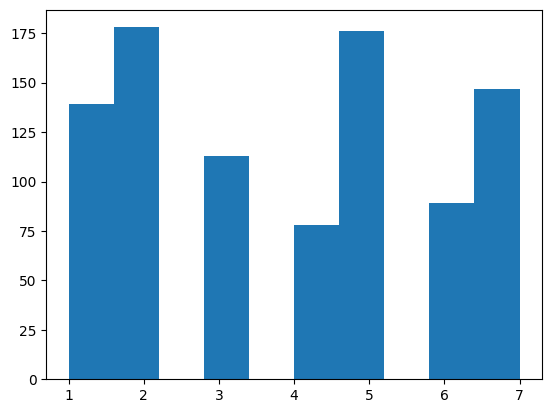

F1 score with hold-out test dataset : 123


In [ ]:
# Implement your test set predicition in here

df_test = pd.read_csv('mex_features_test_no_labels.csv')
X_test = df_test.values
#columns_to_drop = ['subject_id', 'exercise']
#X_test = test_df.drop(columns=columns_to_drop, axis=1).values()
print(X_test.shape)
print(type(X_test))

# Train best model
mdl = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="linear", class_weight="balanced"))
])
mdl.fit(X_train, y_train)

# Predict and score
yhat = mdl.predict(X_test)
f1_score = 123

plt.hist(yhat)
plt.show()



In [ ]:
# Save predictions as json for submission
import json

# Convert to dictionary with string keys and Python ints
# Assuming your predictions are in numpy array "y_pred"
pred_dict = {str(i): int(y_pred[i]) for i in range(len(y_pred))}
with open('submission.json', 'w') as f:
    json.dump(pred_dict, f)